In [1]:
import os
import torch
import matplotlib.pyplot as plt
from env_wrapper import BoardsWrapper
from env_internals import BoardsImplementation
from agent_architecture import AgentParams, PPOAgent, save_agents, load_agents
from misc_utils import smooth_list, find_latest_version
from training_loop import train_agents

In [2]:
size = 2
n_landmarks = 1
n_clues = 1
n_questions = 0
max_moves = size ** 2 * 4
history_len = 4
instant_reward_multiplier = 2.0
end_reward_multiplier = 10.0

env_seed = 12
sender_seed = 135
receiver_seed = 246
torch.manual_seed(45954)
torch.cuda.manual_seed(45954)

hidden_size = size ** 2 * 32
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

env_internals = BoardsImplementation(size, n_landmarks, n_clues, n_questions, seed = env_seed)
env = BoardsWrapper(env_internals, max_moves, history_len, instant_reward_multiplier, end_reward_multiplier, device)

sender_parameters = AgentParams(gamma = 0.99, alpha = 2e-4, gae_lambda = 0.95, policy_clip = 0.1, batch_size = 4, n_epochs = 5, seed = sender_seed)
receiver_parameters = AgentParams(gamma = 0.99, alpha = 2e-4, gae_lambda = 0.95, policy_clip = 0.1, batch_size = 4, n_epochs = 5, seed = receiver_seed)
sender_agent = PPOAgent(size, history_len, env.sender_n_actions, hidden_size, device, sender_parameters)
receiver_agent = PPOAgent(size, history_len, env.receiver_n_actions, hidden_size, device, receiver_parameters)

cuda


In [3]:
model_folder = "./models"
os.makedirs(model_folder, exist_ok = True)
series_name = f"networks-only_{size}x{size}_{n_landmarks}_{n_clues}_{n_questions}_{max_moves}_{history_len}"
agents_file_name = f"agents_{series_name}"
model_path, model_version = find_latest_version(model_folder, agents_file_name, "_iteration_", ".pkl")
if model_path is not None:
    sender_agent, receiver_agent = load_agents(model_path)

Episode 0, Performance: 0.0000
Episode 500, Performance: 1.0000
Episode 1000, Performance: 0.0000
Episode 1500, Performance: 1.0000
Episode 2000, Performance: 1.0000
Episode 2500, Performance: 0.0000
Episode 3000, Performance: -0.4142
Episode 3500, Performance: 1.0000
Episode 4000, Performance: -1.8284
Episode 4500, Performance: 1.0000
Episode 5000, Performance: 1.0000
Episode 5500, Performance: 0.2929
Episode 6000, Performance: 1.0000
Episode 6500, Performance: 1.0000
Episode 7000, Performance: -1.0000
Episode 7500, Performance: 0.2929
Episode 8000, Performance: 0.2929
Episode 8500, Performance: 0.2929
Episode 9000, Performance: 1.0000
Episode 9500, Performance: 0.2929
Animation saved to: d:\Ratel_Archive\Coding\Projects\Python\ShadowAgents\shadow_boards\animations\animation_1.gif


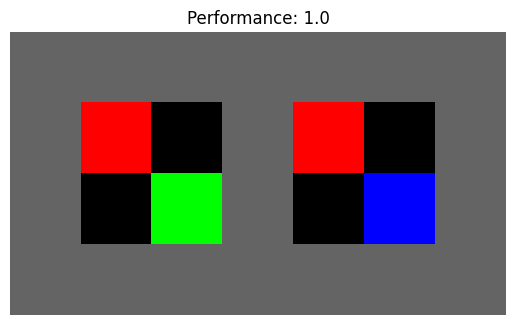

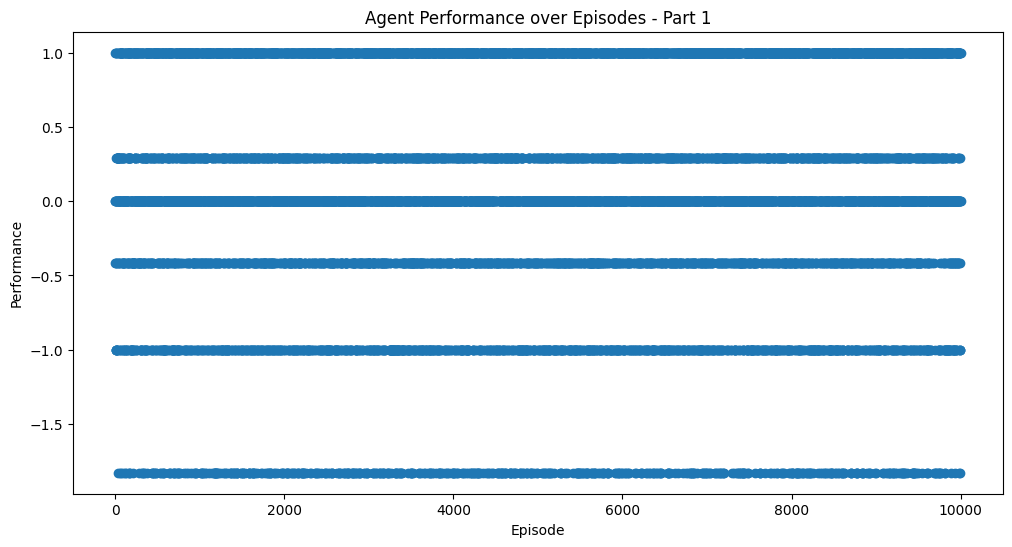

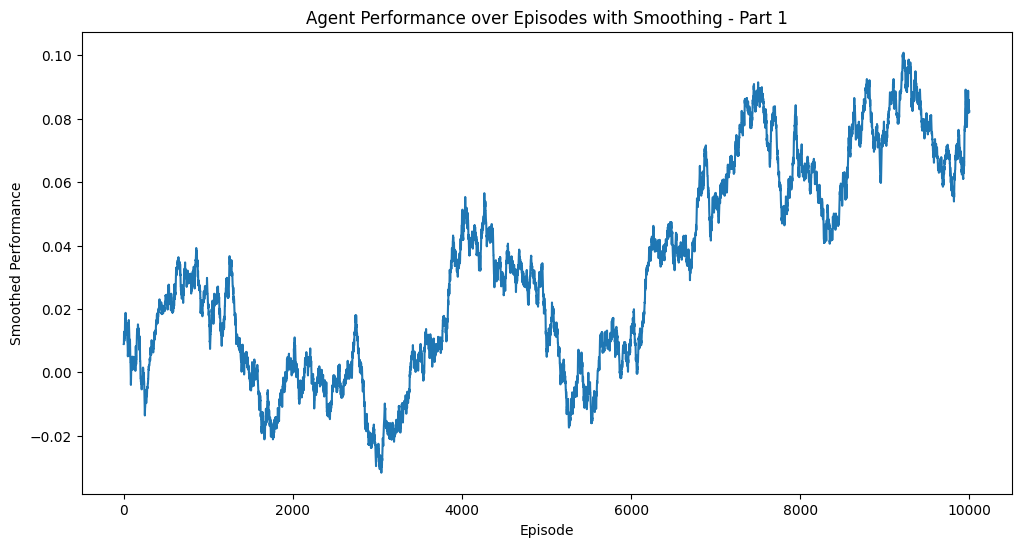

Episode 0, Performance: 0.0000
Episode 500, Performance: 0.2929
Episode 1000, Performance: 0.0000
Episode 1500, Performance: 1.0000
Episode 2000, Performance: 1.0000
Episode 2500, Performance: 0.2929
Episode 3000, Performance: 0.0000
Episode 3500, Performance: 0.0000
Episode 4000, Performance: -0.4142
Episode 4500, Performance: 1.0000
Episode 5000, Performance: -1.0000
Episode 5500, Performance: 0.0000
Episode 6000, Performance: -1.0000
Episode 6500, Performance: 0.0000
Episode 7000, Performance: 0.0000
Episode 7500, Performance: 0.0000
Episode 8000, Performance: 0.0000
Episode 8500, Performance: 0.0000
Episode 9000, Performance: 0.0000
Episode 9500, Performance: 0.0000
Animation saved to: d:\Ratel_Archive\Coding\Projects\Python\ShadowAgents\shadow_boards\animations\animation_2.gif


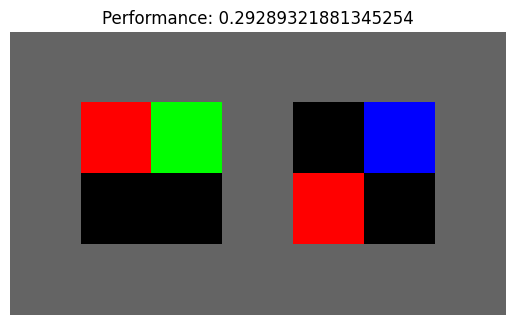

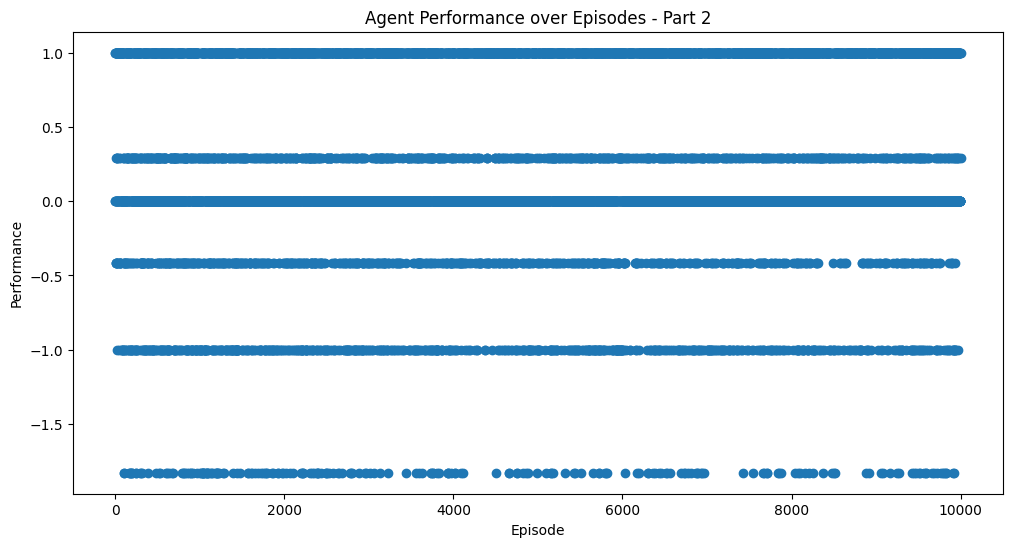

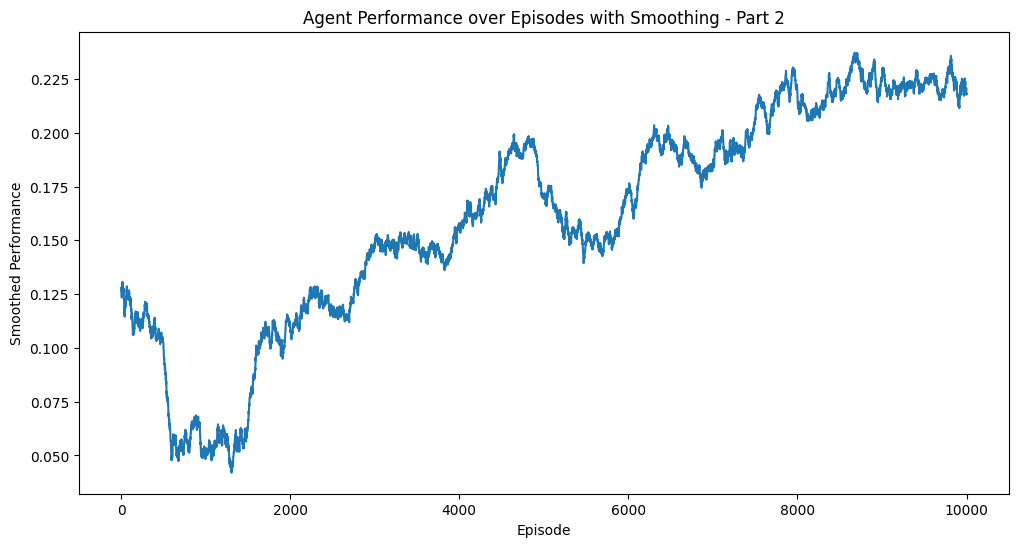

Episode 0, Performance: 1.0000
Episode 500, Performance: 1.0000
Episode 1000, Performance: 1.0000
Episode 1500, Performance: 0.0000
Episode 2000, Performance: 0.0000
Episode 2500, Performance: 0.0000
Episode 3000, Performance: 0.0000
Episode 3500, Performance: 0.0000
Episode 4000, Performance: -1.8284
Episode 4500, Performance: 1.0000
Episode 5000, Performance: 1.0000
Episode 5500, Performance: 1.0000
Episode 6000, Performance: -1.0000
Episode 6500, Performance: 0.0000
Episode 7000, Performance: 1.0000
Episode 7500, Performance: 0.0000
Episode 8000, Performance: 0.0000
Episode 8500, Performance: 1.0000
Episode 9000, Performance: 0.2929
Episode 9500, Performance: 0.0000
Animation saved to: d:\Ratel_Archive\Coding\Projects\Python\ShadowAgents\shadow_boards\animations\animation_3.gif


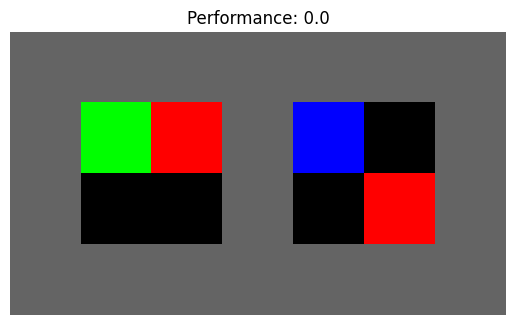

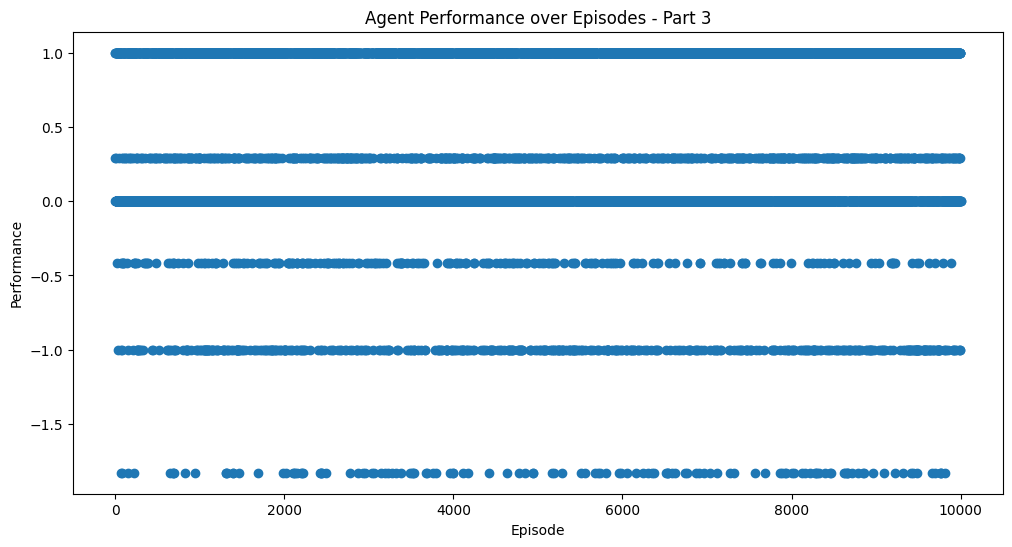

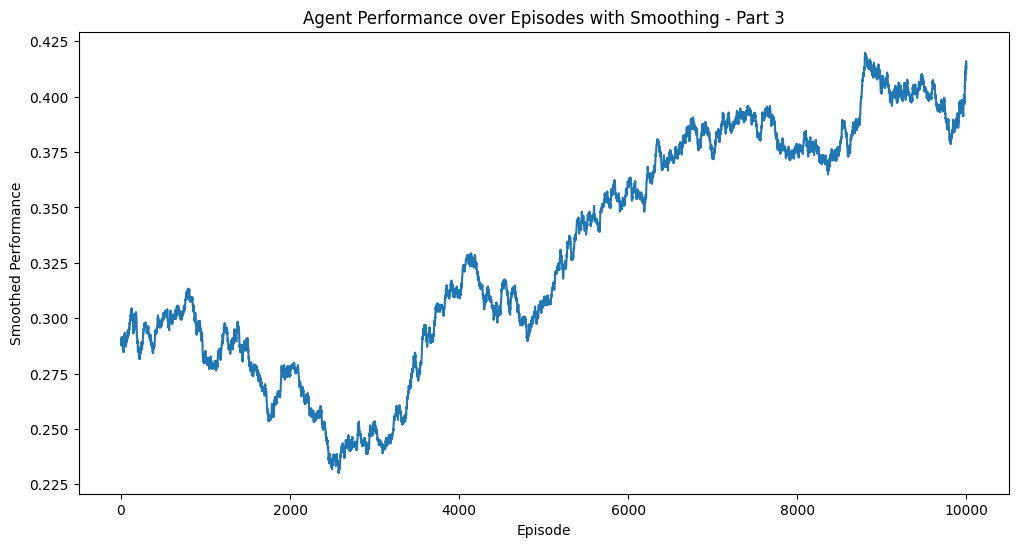

Episode 0, Performance: 0.2929
Episode 500, Performance: 0.0000
Episode 1000, Performance: 1.0000
Episode 1500, Performance: 0.0000
Episode 2000, Performance: 0.0000
Episode 2500, Performance: 0.0000
Episode 3000, Performance: 1.0000
Episode 3500, Performance: 0.0000
Episode 4000, Performance: 1.0000
Episode 4500, Performance: 1.0000
Episode 5000, Performance: 1.0000
Episode 5500, Performance: 1.0000
Episode 6000, Performance: -1.8284
Episode 6500, Performance: 1.0000
Episode 7000, Performance: 1.0000
Episode 7500, Performance: 0.0000
Episode 8000, Performance: 1.0000
Episode 8500, Performance: 1.0000
Episode 9000, Performance: 0.0000
Episode 9500, Performance: 1.0000
Animation saved to: d:\Ratel_Archive\Coding\Projects\Python\ShadowAgents\shadow_boards\animations\animation_4.gif


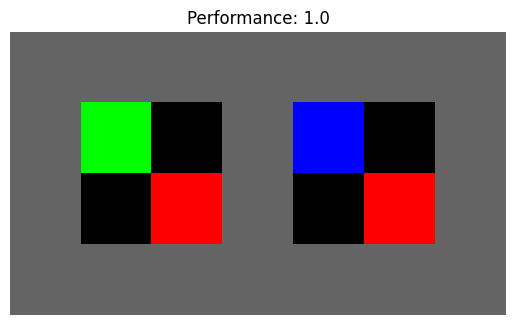

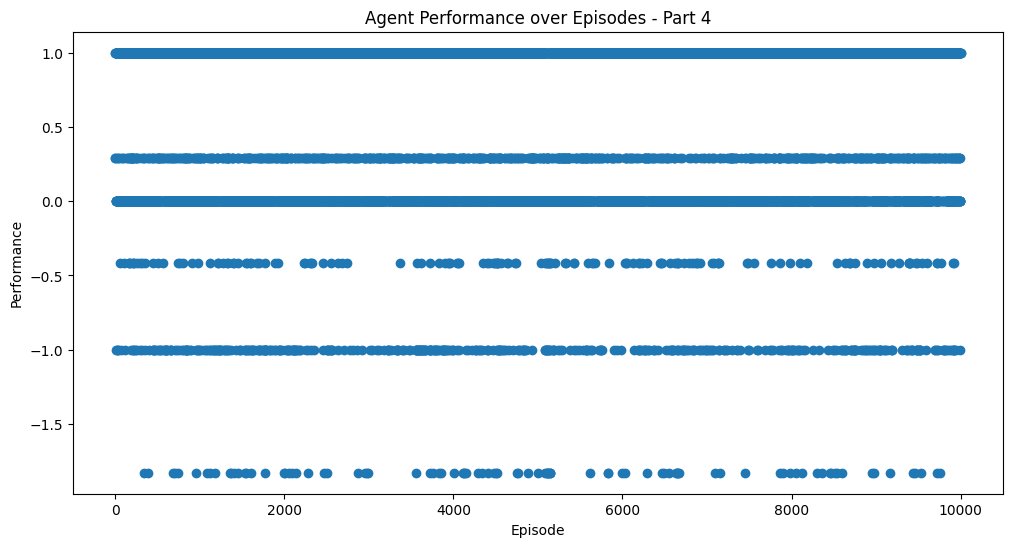

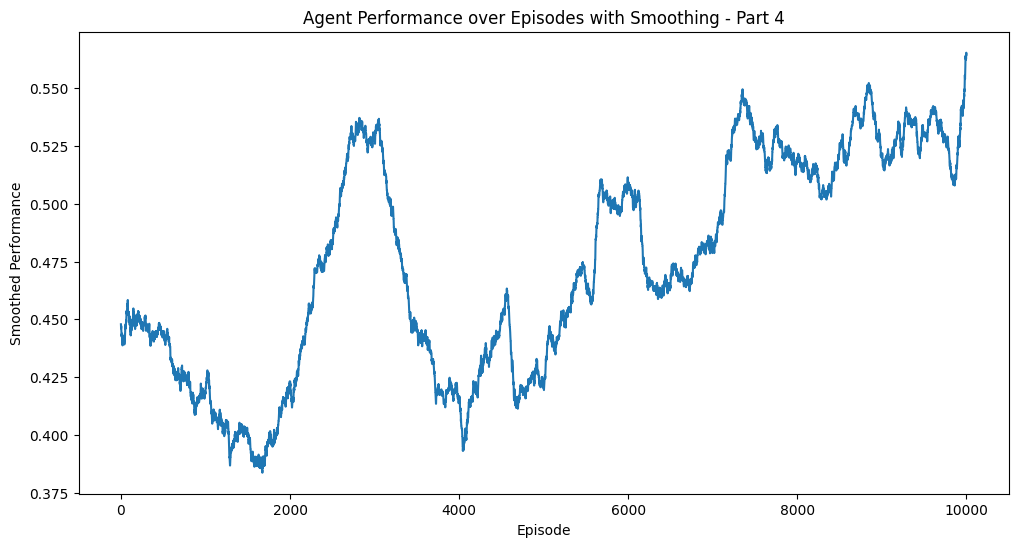

Episode 0, Performance: 1.0000
Episode 500, Performance: 1.0000
Episode 1000, Performance: 0.0000
Episode 1500, Performance: 0.2929
Episode 2000, Performance: 1.0000
Episode 2500, Performance: 1.0000
Episode 3000, Performance: 1.0000
Episode 3500, Performance: 0.0000
Episode 4000, Performance: 1.0000
Episode 4500, Performance: 1.0000
Episode 5000, Performance: 1.0000
Episode 5500, Performance: 1.0000
Episode 6000, Performance: 1.0000
Episode 6500, Performance: 1.0000
Episode 7000, Performance: 1.0000
Episode 7500, Performance: 1.0000
Episode 8000, Performance: 1.0000
Episode 8500, Performance: 1.0000
Episode 9000, Performance: 1.0000
Episode 9500, Performance: 0.0000
Animation saved to: d:\Ratel_Archive\Coding\Projects\Python\ShadowAgents\shadow_boards\animations\animation_5.gif


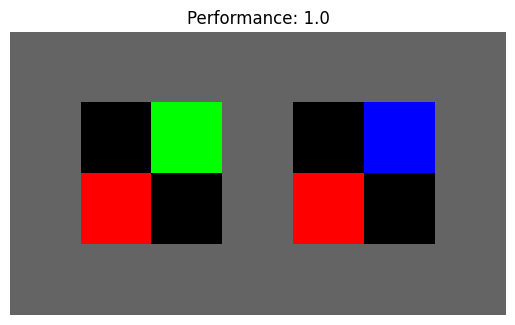

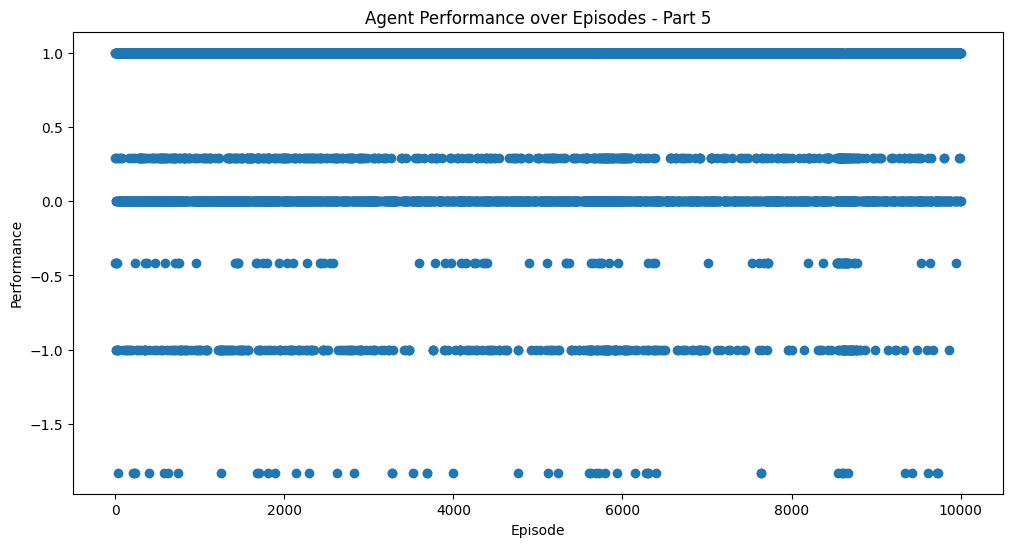

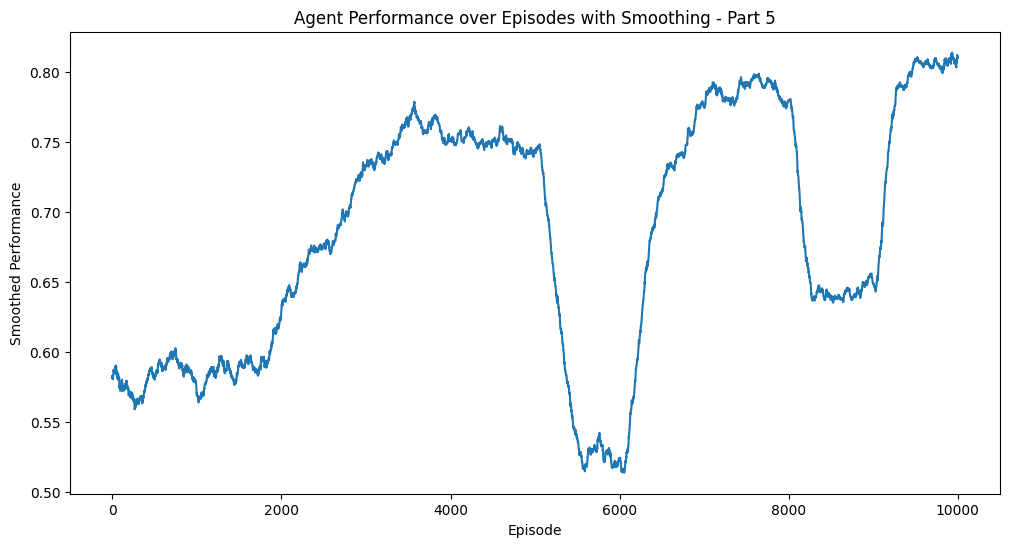

Episode 0, Performance: 0.0000
Episode 500, Performance: 1.0000
Episode 1000, Performance: 1.0000
Episode 1500, Performance: 1.0000
Episode 2000, Performance: 1.0000
Episode 2500, Performance: 1.0000
Episode 3000, Performance: 0.0000
Episode 3500, Performance: 0.0000
Episode 4000, Performance: 0.0000
Episode 4500, Performance: 1.0000
Episode 5000, Performance: 1.0000
Episode 5500, Performance: 1.0000
Episode 6000, Performance: 1.0000
Episode 6500, Performance: 1.0000
Episode 7000, Performance: 1.0000
Episode 7500, Performance: 1.0000
Episode 8000, Performance: 1.0000
Episode 8500, Performance: 0.0000
Episode 9000, Performance: 1.0000
Episode 9500, Performance: 1.0000
Animation saved to: d:\Ratel_Archive\Coding\Projects\Python\ShadowAgents\shadow_boards\animations\animation_6.gif


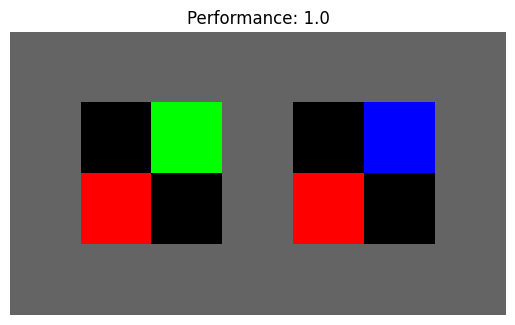

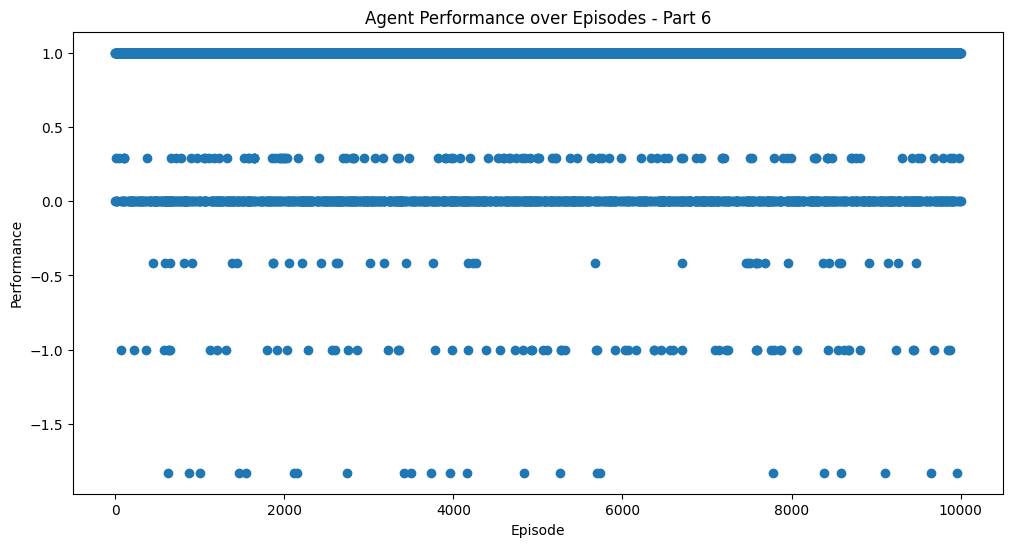

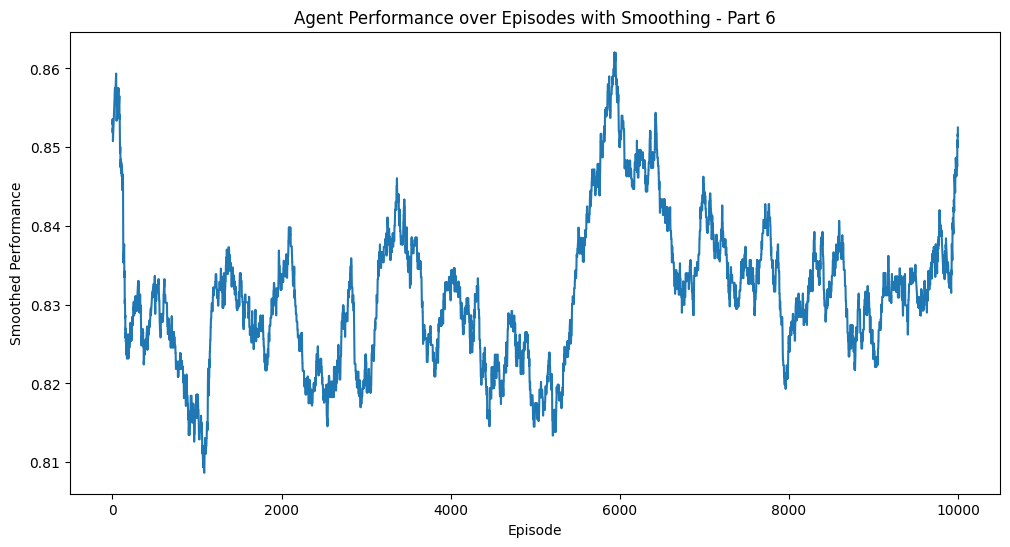

Episode 0, Performance: 1.0000
Episode 500, Performance: 0.0000
Episode 1000, Performance: 1.0000
Episode 1500, Performance: 1.0000
Episode 2000, Performance: 0.0000
Episode 2500, Performance: 1.0000
Episode 3000, Performance: 1.0000
Episode 3500, Performance: 1.0000
Episode 4000, Performance: 1.0000
Episode 4500, Performance: 1.0000
Episode 5000, Performance: 1.0000
Episode 5500, Performance: 1.0000
Episode 6000, Performance: 1.0000
Episode 6500, Performance: 1.0000
Episode 7000, Performance: 0.0000
Episode 7500, Performance: 1.0000
Episode 8000, Performance: 1.0000
Episode 8500, Performance: 1.0000
Episode 9000, Performance: 1.0000
Episode 9500, Performance: 1.0000
Animation saved to: d:\Ratel_Archive\Coding\Projects\Python\ShadowAgents\shadow_boards\animations\animation_7.gif


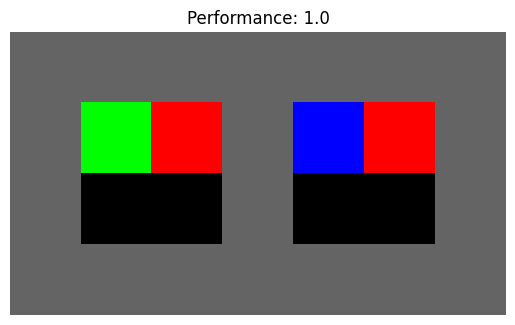

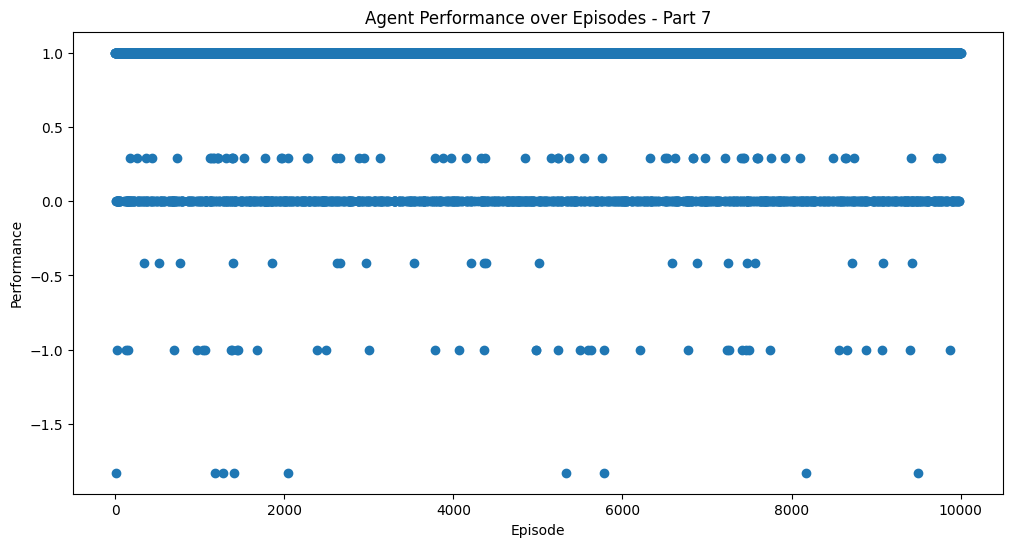

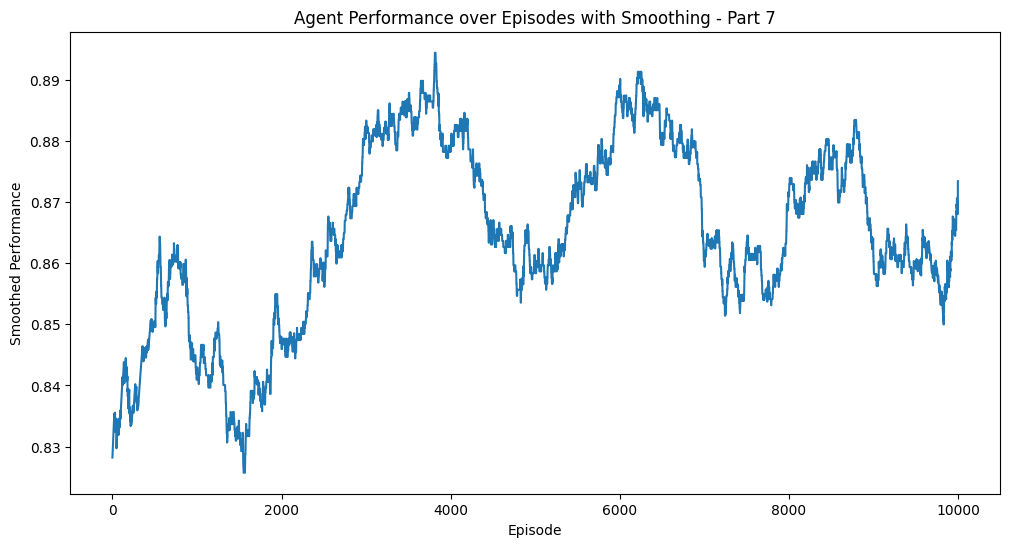

Episode 0, Performance: 0.0000
Episode 500, Performance: 0.0000
Episode 1000, Performance: 0.0000
Episode 1500, Performance: 1.0000
Episode 2000, Performance: 1.0000
Episode 2500, Performance: 1.0000
Episode 3000, Performance: 1.0000
Episode 3500, Performance: 1.0000
Episode 4000, Performance: 1.0000
Episode 4500, Performance: 1.0000
Episode 5000, Performance: 1.0000
Episode 5500, Performance: 1.0000
Episode 6000, Performance: 1.0000
Episode 6500, Performance: 1.0000
Episode 7000, Performance: 1.0000
Episode 7500, Performance: 1.0000
Episode 8000, Performance: 1.0000
Episode 8500, Performance: 1.0000
Episode 9000, Performance: 1.0000
Episode 9500, Performance: 0.0000
Animation saved to: d:\Ratel_Archive\Coding\Projects\Python\ShadowAgents\shadow_boards\animations\animation_8.gif


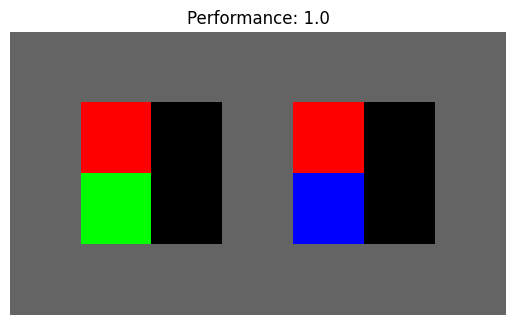

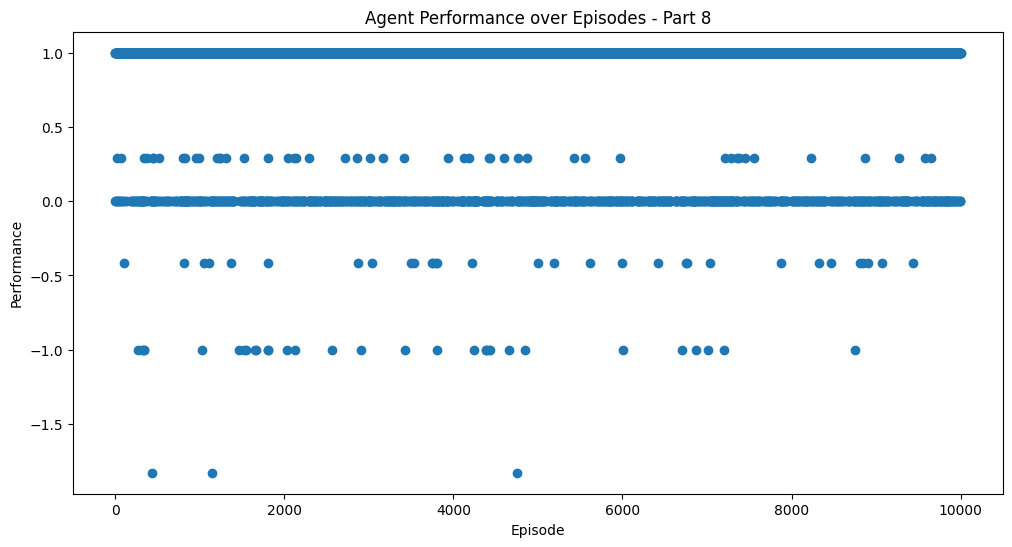

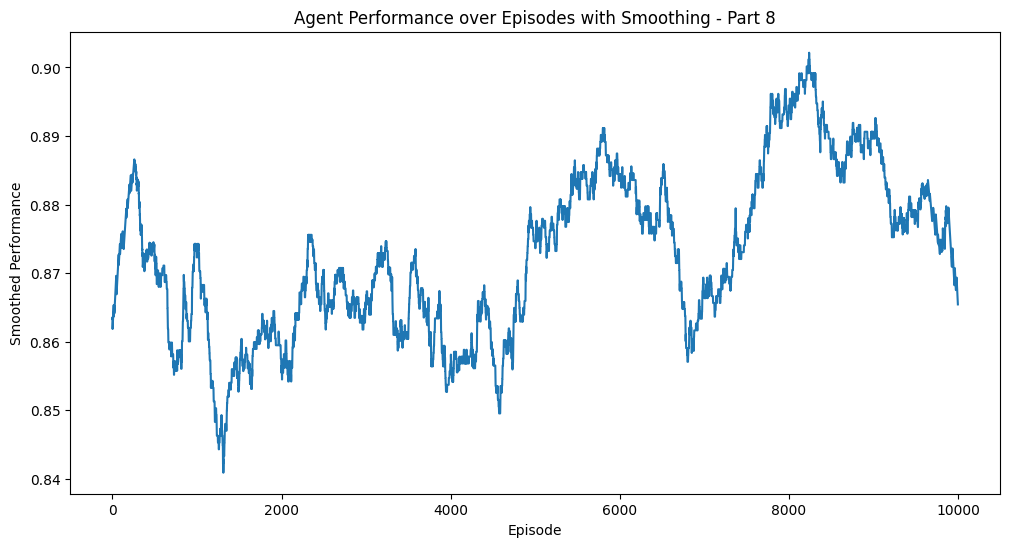

Episode 0, Performance: 1.0000
Episode 500, Performance: 1.0000
Episode 1000, Performance: 1.0000
Episode 1500, Performance: 1.0000
Episode 2000, Performance: 1.0000
Episode 2500, Performance: 1.0000
Episode 3000, Performance: 1.0000
Episode 3500, Performance: 1.0000
Episode 4000, Performance: 0.0000
Episode 4500, Performance: 1.0000
Episode 5000, Performance: 1.0000
Episode 5500, Performance: 1.0000
Episode 6000, Performance: 1.0000
Episode 6500, Performance: 1.0000
Episode 7000, Performance: 1.0000
Episode 7500, Performance: 1.0000
Episode 8000, Performance: 1.0000
Episode 8500, Performance: 1.0000
Episode 9000, Performance: 1.0000
Episode 9500, Performance: 1.0000
Animation saved to: d:\Ratel_Archive\Coding\Projects\Python\ShadowAgents\shadow_boards\animations\animation_9.gif


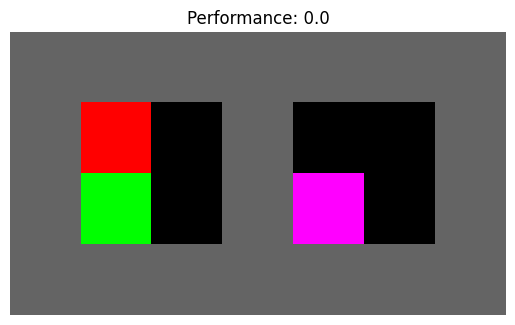

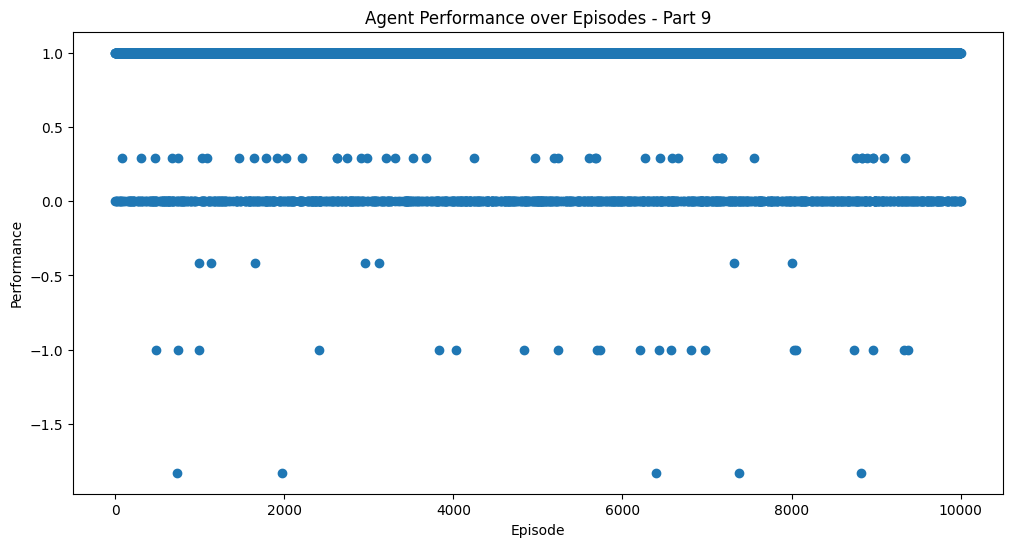

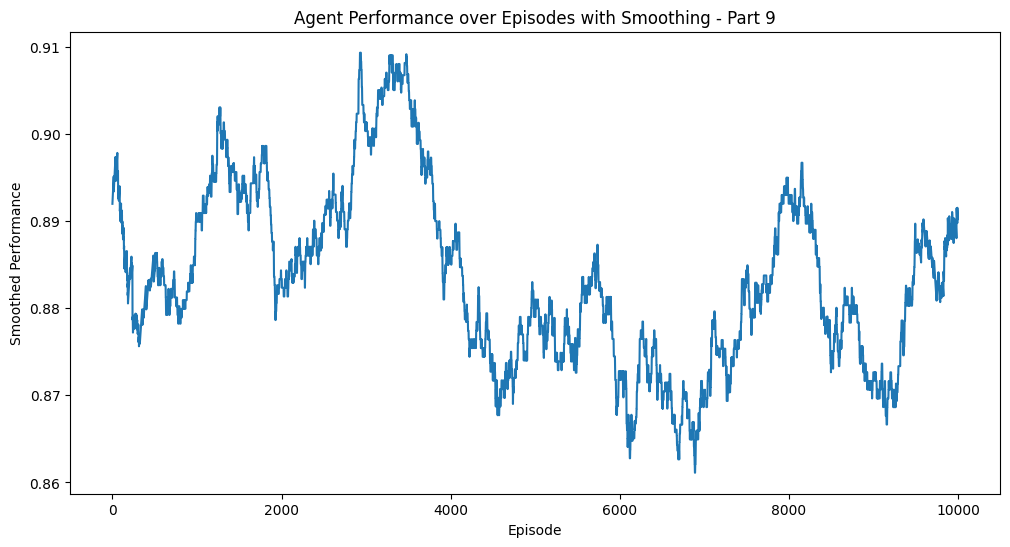

Episode 0, Performance: 1.0000
Episode 500, Performance: 1.0000
Episode 1000, Performance: 1.0000
Episode 1500, Performance: 1.0000
Episode 2000, Performance: 1.0000
Episode 2500, Performance: 1.0000
Episode 3000, Performance: 1.0000
Episode 3500, Performance: 1.0000
Episode 4000, Performance: 1.0000
Episode 4500, Performance: 1.0000
Episode 5000, Performance: 1.0000
Episode 5500, Performance: 1.0000
Episode 6000, Performance: 1.0000
Episode 6500, Performance: 1.0000
Episode 7000, Performance: 1.0000
Episode 7500, Performance: 1.0000
Episode 8000, Performance: 1.0000
Episode 8500, Performance: 1.0000
Episode 9000, Performance: 1.0000
Episode 9500, Performance: 0.0000
Animation saved to: d:\Ratel_Archive\Coding\Projects\Python\ShadowAgents\shadow_boards\animations\animation_10.gif


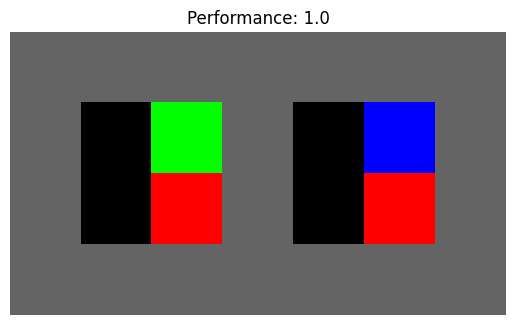

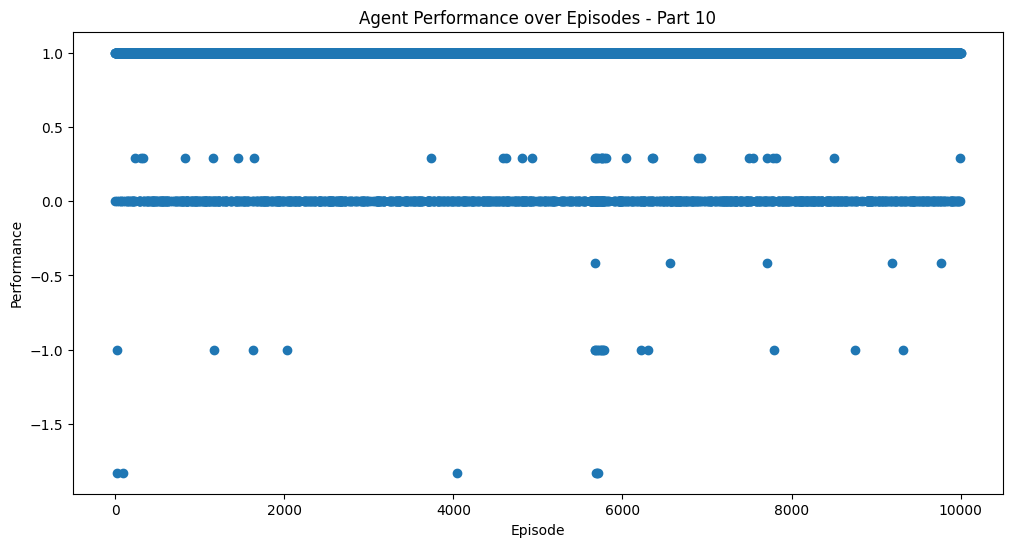

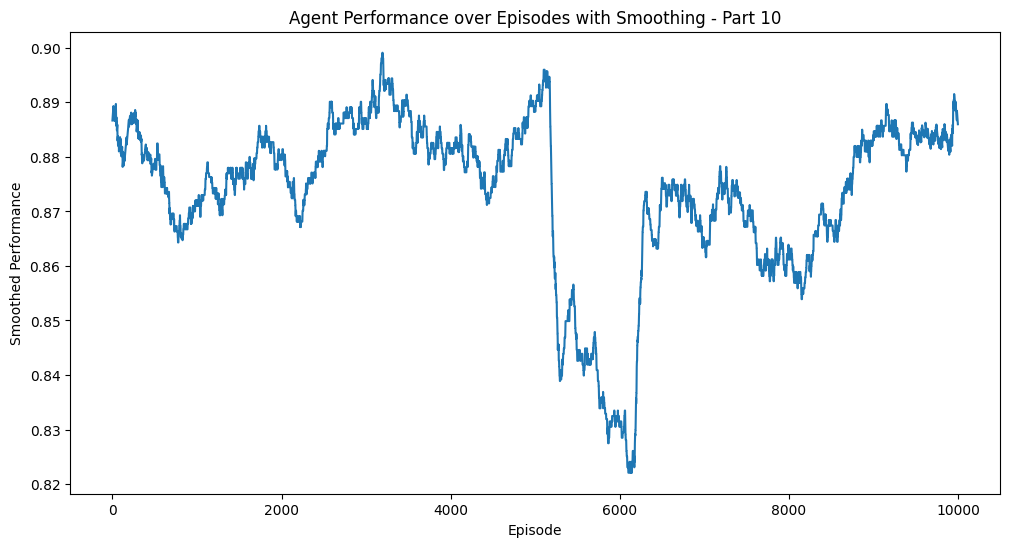

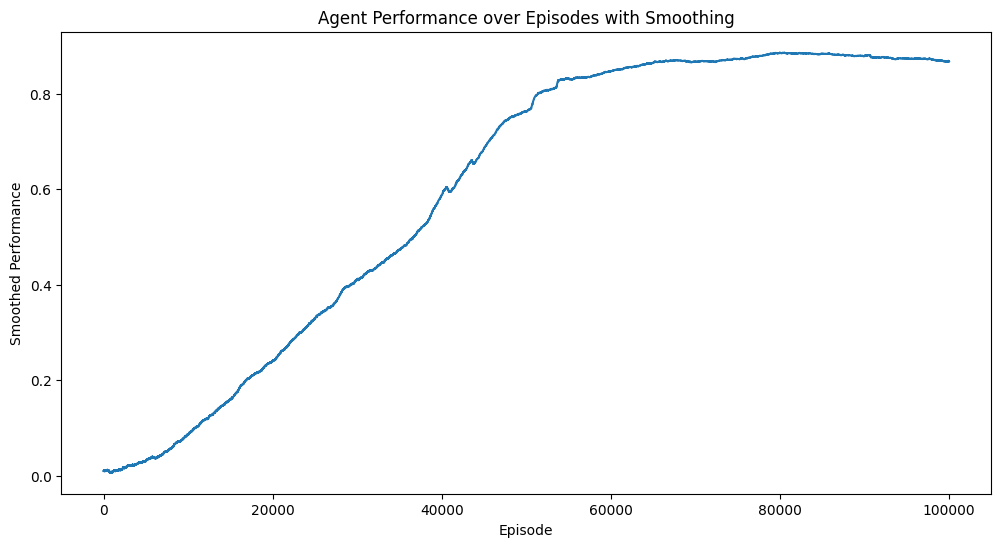

In [4]:
n_epochs = 10
n_episodes = 10_000
all_performances = list()

for i in range(n_epochs):
    performances = train_agents(env, sender_agent, receiver_agent, n_episodes)
    smoothed_performances = smooth_list(performances, n_episodes // 20)
    all_performances.extend(performances)
    env.render()
    
    plt.figure(figsize = (12, 6))
    plt.scatter(range(n_episodes), performances)
    plt.xlabel("Episode")
    plt.ylabel("Performance")
    plt.title(f"Agent Performance over Episodes - Part {i + 1}")
    plt.show()
    
    plt.figure(figsize = (12, 6))
    plt.plot(smoothed_performances)
    plt.xlabel("Episode")
    plt.ylabel("Smoothed Performance")
    plt.title(f"Agent Performance over Episodes with Smoothing - Part {i + 1}")
    plt.show()
    
    save_agents(sender_agent, receiver_agent, os.path.join(model_folder, f"{agents_file_name}_iteration_{model_version + i + 1}.pkl"))

smoothed_total = smooth_list(all_performances, len(all_performances) // 20)
plt.figure(figsize = (12, 6))
plt.plot(smoothed_total)
plt.xlabel("Episode")
plt.ylabel("Smoothed Performance")
plt.title(f"Agent Performance over Episodes with Smoothing")
plt.show()